# **Machine Learning using Grammatical Evolution Exploratory Data Analysis**
### Classification of mammogram segments as containing or not containing suspicious growth. 
Ranya El-Hwigi 18227449

### ***Importing libraries***

In [1]:
!pip install deap
import numpy as np
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from deap import creator, base, tools
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### ***Data Exploration***

There are 2 datasets availble. A larger data set containing the full data and a smaller data set containing a subset of the data.

**Large dataset**

In [ ]:
# loading in the full dataset into a pandas dataframe from GitHub
full_data = pd.read_csv('https://media.githubusercontent.com/media/relhwigi/GE_GRAPE_Mammogram_Classification/main/data/haralick02.csv')

# checking the data
full_data.head()

,PatientID,StudyID,PatientAge,ImgID,View,SegmentPosition,x0,x1,x2,x3,...,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
0,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LA1,0.019791,70.750121,0.986798,2679.422225,...,0.236469,125.710631,6357.903033,7.732227,11.447468,0.000271,4.279557,-0.326134,0.994207,0
1,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,RA1,0.994207,-0.326134,4.279557,0.000271,...,11.202839,7.747646,10646.938779,147.661857,0.280588,2679.422225,0.986798,70.750121,0.019791,0
2,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LB1,0.176898,29.279795,0.991535,1729.360146,...,0.434262,70.013911,3753.220753,6.121706,8.761205,0.000787,3.495691,-0.387325,0.992537,0
3,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,RB1,0.992537,-0.387325,3.495691,0.000787,...,7.678311,5.588478,6888.160789,69.492803,0.543738,1729.360146,0.991535,29.279795,0.176898,0
4,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LC1,0.525843,7.001352,0.994143,597.735239,...,0.668818,37.178428,2643.774206,4.044079,5.525354,0.001611,2.364907,-0.474126,0.983734,0


In [ ]:
full_data.describe()

,PatientAge,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
count,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,...,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000,405280.000000
mean,60.345638,0.546924,25.173811,2.148299,618.533917,4.655893,58.528287,4909.080950,58.198189,4.591705,...,4.591705,58.198189,4909.080950,58.528287,4.655893,618.533917,2.148299,25.173811,0.546924,0.030248
std,8.212397,0.453399,37.215509,1.555457,932.928751,5.137900,76.282008,3965.230680,75.787156,5.067607,...,5.067607,75.787156,3965.230680,76.282008,5.137900,932.928751,1.555457,37.215509,0.453399,0.171270
min,30.000000,0.000000,-1.000000,-0.000204,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000204,-1.000000,0.000000,0.000000
25%,54.000000,0.001709,-0.309129,0.975508,0.000301,0.216874,6.764909,2086.682893,6.773880,0.192860,...,0.192860,6.773880,2086.682893,6.764909,0.216874,0.000301,0.975508,-0.309129,0.001709,0.000000
50%,61.000000,0.821703,0.000000,0.995603,0.004511,0.952885,8.205620,4073.782556,8.193836,0.957408,...,0.957408,8.193836,4073.782556,8.205620,0.952885,0.004511,0.995603,0.000000,0.821703,0.000000
75%,66.000000,0.987784,46.411842,3.961258,1029.679274,10.832815,103.590306,6732.489374,103.210966,10.643587,...,10.643587,103.210966,6732.489374,103.590306,10.832815,1029.679274,3.961258,46.411842,0.987784,0.000000
max,93.000000,1.000000,1974.782692,6.718097,12581.824994,14.739384,484.777437,53102.665299,473.620478,14.569183,...,14.569183,473.620478,53102.665299,484.777437,14.739384,12581.824994,6.718097,1974.782692,1.000000,1.000000


In [ ]:
dataTypeSeries = full_data.dtypes
dataTypeSeries

PatientID      object
StudyID        object
PatientAge      int64
ImgID          object
View           object
               ...   
x100          float64
x101          float64
x102          float64
x103          float64
Label           int64
Length: 111, dtype: object

**Smaller dataset**

In [ ]:
# loading in the sample dataset into a pandas dataframe from GitHub
some_data = pd.read_csv('https://media.githubusercontent.com/media/relhwigi/GE_GRAPE_Mammogram_Classification/main/data/haralick02_250K.csv')

# checking the data
some_data.tail()

,PatientID,StudyID,PatientAge,ImgID,View,SegmentPosition,x0,x1,x2,x3,...,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
24994,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LC4,0.580839,3.045049,0.997699,661.727190,...,0.890533,17.894517,2432.550097,1.636074,2.120537,0.004044,1.030084,-0.579495,0.907051,0
24995,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,RC4,0.907051,-0.579495,1.030084,0.004044,...,3.163219,2.494799,2643.863713,26.268896,0.836922,661.727190,0.997699,3.045049,0.580839,0
24996,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LD4,0.826577,0.954606,0.998275,276.728460,...,0.981381,2.450326,335.995648,0.334633,0.412324,0.005377,0.236487,-0.658832,0.577138,0
24997,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,RD4,0.577138,-0.658832,0.236487,0.005377,...,1.339445,1.102387,1105.959234,9.732558,0.940576,276.728460,0.998275,0.954606,0.826577,0
24998,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LE4,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0


In [ ]:
some_data.describe()

,PatientAge,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,...,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,60.986999,0.548173,25.738719,2.156005,619.214734,4.675004,58.736822,4953.080076,58.194899,4.606760,...,4.606800,58.194899,4953.080076,58.736822,4.674964,619.214734,2.155965,25.738719,0.548133,0.039242
std,8.720832,0.453014,37.296522,1.554227,939.078981,5.141628,76.703971,4048.636167,75.784070,5.074375,...,5.074342,75.784070,4048.636167,76.703971,5.141660,939.078981,1.554270,37.296522,0.453019,0.194173
min,33.000000,0.000000,-0.870049,-0.000177,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000177,-0.870049,0.000000,0.000000
25%,54.000000,0.001709,-0.309443,0.975045,0.000305,0.215440,6.764497,2140.233816,6.800618,0.192834,...,0.192900,6.800618,2140.233816,6.764497,0.215365,0.000305,0.975041,-0.309443,0.001707,0.000000
50%,62.000000,0.826494,0.000000,0.995679,0.004554,0.955813,8.221639,4036.404391,8.199410,0.955046,...,0.955099,8.199410,4036.404391,8.221639,0.955498,0.004554,0.995679,0.000000,0.826442,0.000000
75%,67.000000,0.987624,47.613908,3.953388,1012.255813,10.829464,103.278060,6725.904385,102.029436,10.654104,...,10.654104,102.029436,6725.904385,103.278060,10.829464,1012.255813,3.953388,47.613908,0.987622,0.000000
max,87.000000,1.000000,203.571327,4.981048,12305.698968,13.350262,479.516852,49201.885871,457.428147,13.260156,...,13.260156,457.428147,49201.885871,479.516852,13.350262,12305.698968,4.981048,203.571327,1.000000,1.000000


**Extracting information on the data**

*Size of full dataset*

In [ ]:
# number of rows in full dataset
full_number_of_samples = full_data['PatientID'].count()
full_number_of_samples

405280

*Size of sample dataset*

In [ ]:
# number of rows in some dataset
some_number_of_samples = some_data['PatientID'].count()
some_number_of_samples

24999

*Visualisation of size difference*

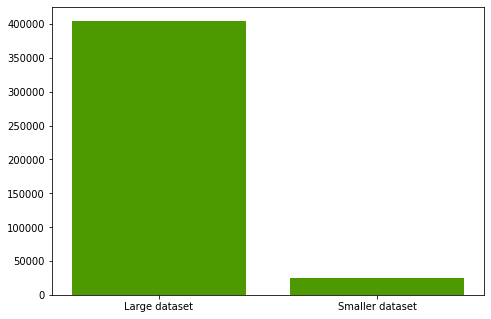

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sets = ['Large dataset', 'Smaller dataset']
samples = [full_number_of_samples, some_number_of_samples]
ax.bar(sets,samples, color="#4d9900")
plt.show()

*Full dataset label distribution*

In [ ]:
# number of positive and negative cases in full dataset
full_label_distribution = full_data['Label'].value_counts()
full_label_distribution

0    393021
1     12259
Name: Label, dtype: int64


*Visualisation of label distribution*

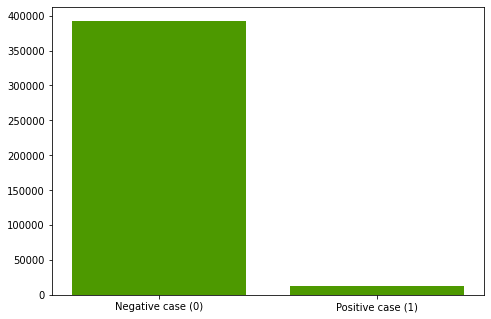

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Negative case (0)', 'Positive case (1)']
ax.bar(label , full_label_distribution, color="#4d9900")
plt.show()

*Some dataset label distribution*

In [ ]:
# number of positive and negative cases in some dataset
some_label_distribution = some_data['Label'].value_counts()
some_label_distribution

0    24018
1      981
Name: Label, dtype: int64

*Mammogram views*

In [ ]:
# the different mammogram views in the dataset
views = full_data.View.unique()
views

array(['CC', 'MLO', 'XCCL', 'ML', 'LM'], dtype=object)

In [ ]:
# getting the number of times each row occurs
CC_popularity = len(full_data.loc[full_data['View'] == 'CC'])
MLO_popularity = len(full_data.loc[full_data['View'] == 'MLO'])
XCCL_popularity = len(full_data.loc[full_data['View'] == 'XCCL'])
ML_popularity = len(full_data.loc[full_data['View'] == 'ML'])
LM_popularity = len(full_data.loc[full_data['View'] == 'LM'])

In [ ]:
CC_popularity

205520

In [ ]:
MLO_popularity

199320

In [ ]:
XCCL_popularity

120

In [ ]:
ML_popularity

240

In [ ]:
LM_popularity

80

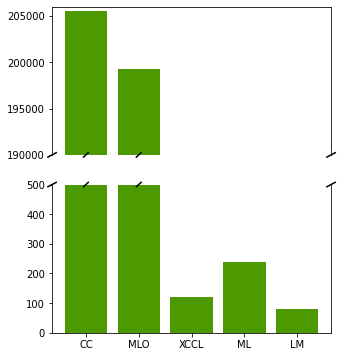

In [ ]:
views = ['CC', 'MLO', 'XCCL', 'ML', 'LM']
views_distribution = [CC_popularity, MLO_popularity, XCCL_popularity, ML_popularity, LM_popularity]
XX = pd.Series(views_distribution,index=views)
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(5,6))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 500
ts = 190000

ax2.set_ylim(0,bs)
ax1.set_ylim(ts,206000)
ax1.set_yticks(np.arange(190000,206000,5000))

bars1 = ax1.bar(XX.index, XX.values, color="#4d9900")
bars2 = ax2.bar(XX.index, XX.values, color="#4d9900")

for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+3*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+3*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())
plt.show()

*Percentage of samples that are CC or MLO view*

In [ ]:
((CC_popularity+MLO_popularity)/full_number_of_samples)*100

99.89143308330043

*Mammogram segments*

In [ ]:
# the different mammogram segments in the dataset
segments = full_data.SegmentPosition.unique()
segments

array(['LA1', 'RA1', 'LB1', 'RB1', 'LC1', 'RC1', 'LD1', 'RD1', 'LE1',
       'RE1', 'LA2', 'RA2', 'LB2', 'RB2', 'LC2', 'RC2', 'LD2', 'RD2',
       'LE2', 'RE2', 'LA3', 'RA3', 'LB3', 'RB3', 'LC3', 'RC3', 'LD3',
       'RD3', 'LE3', 'RE3', 'LA4', 'RA4', 'LB4', 'RB4', 'LC4', 'RC4',
       'LD4', 'RD4', 'LE4', 'RE4'], dtype=object)

*Approximate number of patients in full dataset*

In [ ]:
len(full_data.PatientID.unique())

4919

Approximate number of patients in sample dataset

In [ ]:
len(some_data.PatientID.unique())

315

*Columns in the datasets*

In [ ]:
number_of_all_columns = len(full_data.columns)
number_of_all_columns

111

In [ ]:
# the column names in both datasets are the same, extracting them here
all_columns = full_data.columns.to_list()

### ***Data Preprocessing***

The data is already very clean and concise but there are a few columns that are unnecessary for the task at hand. 

**Dropping columns from large dataset**

In [ ]:
values = ['XCCL', 'ML', 'LM']

full_data = full_data[full_data.View.isin(values) == False]

In [ ]:
full_data.View.unique()

array(['CC', 'MLO'], dtype=object)

In [ ]:
full_data['PatientID'].count()

404840

In [ ]:
full_data.drop(['PatientID', 'StudyID', 'PatientAge', 'ImgID', 'View', 'SegmentPosition'], axis=1, inplace=True)
final_columns = full_data.columns.to_list()

**Dropping columns from smaller dataset**

In [ ]:
some_data.drop(['PatientID', 'StudyID', 'PatientAge', 'ImgID', 'View', 'SegmentPosition'], axis=1, inplace=True)

**Number of columns remaining**

In [ ]:
final_number_of_columns = len(final_columns)
final_number_of_columns

105